# Data Injection and Cleaning

## Import related python modules

In [55]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

## Load csv file to dataframe

In [56]:
#load csv file to dataframe
df1 = pd.read_csv("HK_housing_price.csv")

## Data Cleansing

### Drop unwanted columns

In [57]:
df2 = df1.drop(['Unnamed: 0','date','address','changes','Tower','Flat','Phase','Block'], axis='columns')
df2.head()

,price,saleable_area(ft^2),unit_rate,district,Rental,Public Housing,floor
0,33000,816,40,Kowloon Kowloon City District,True,False,13.0
1,15800,375,42,Kowloon Kowloon City District,True,False,22.0
2,18800,520,36,Kowloon Kowloon City District,True,False,7.0
3,17000,429,40,Kowloon Kowloon City District,True,False,22.0
4,18000,407,44,Kowloon Kowloon City District,True,False,22.0


### Check for null values

In [58]:
# This chunk of code will demonstrate whether there is null value within the dataset.
df2.isnull().sum()

price                  0
saleable_area(ft^2)    0
unit_rate              0
district               0
Rental                 0
Public Housing         0
floor                  0
dtype: int64

In [59]:
# Identify data types of the columns for further data pre-processing.
df2.dtypes

price                    int64
saleable_area(ft^2)     object
unit_rate                int64
district                object
Rental                    bool
Public Housing            bool
floor                  float64
dtype: object

### Check if saleable_area column that cannot be converted to int

In [60]:
def is_int(column):
    """
        This function will check if the data type of a column can be converted to int or not. 
        If the column can be converted, then the data type of the column will be changed to int. 
    """
    try:
        int(column)
    except:
        return False
    return True

df3 = df2.copy()
df3[~df3['saleable_area(ft^2)'].apply(is_int)]

,price,saleable_area(ft^2),unit_rate,district,Rental,Public Housing,floor
9,38000,"1,155",33,Kowloon Kowloon City District,True,False,13.0
11,51000,"1,029",50,Kowloon Kowloon City District,True,False,13.0
13,76000000,"2,190",34703,Kowloon Kowloon City District,False,False,7.0
25,22800000,"1,101",20705,Kowloon Kowloon City District,False,False,6.0
26,21680000,"1,100",19707,Kowloon Kowloon City District,False,False,15.0
...,...,...,...,...,...,...,...
159531,39000,"1,015",38,HKIsIand Eastern District,True,False,22.0
159552,26500000,"1,124",23577,HKIsIand Eastern District,False,False,4.0
159586,20480000,"1,015",20177,HKIsIand Eastern District,False,False,4.0
159588,25180000,"1,249",20160,HKIsIand Eastern District,False,False,9.0


### Remove all non-digits from saleable_area column

In [61]:
df4 = df2.copy()
df4['saleable_area(ft^2)'] = df4['saleable_area(ft^2)'].str.replace(r'[^0-9]+', '', regex=True)
df4

,price,saleable_area(ft^2),unit_rate,district,Rental,Public Housing,floor
0,33000,816,40,Kowloon Kowloon City District,True,False,13.0
1,15800,375,42,Kowloon Kowloon City District,True,False,22.0
2,18800,520,36,Kowloon Kowloon City District,True,False,7.0
3,17000,429,40,Kowloon Kowloon City District,True,False,22.0
4,18000,407,44,Kowloon Kowloon City District,True,False,22.0
...,...,...,...,...,...,...,...
159671,11670000,643,18146,HKIsIand Eastern District,False,False,13.0
159672,10750000,536,20056,HKIsIand Eastern District,False,False,24.0
159673,11830000,620,19081,HKIsIand Eastern District,False,False,21.0
159674,12300000,580,21207,HKIsIand Eastern District,False,False,16.0


In [62]:
df4['saleable_area(ft^2)'] = df4['saleable_area(ft^2)'].astype(int)
df4['floor'] = df4['floor'].astype(int)
df4.dtypes

price                   int64
saleable_area(ft^2)     int32
unit_rate               int64
district               object
Rental                   bool
Public Housing           bool
floor                   int32
dtype: object

### Flag the property if it is on an 'unlucky' floor.

In [63]:
def create_unlucky_column(row):
    unlucky_floors = [4,13,14,24,18,44]
    if row['floor'] in unlucky_floors:
        return True
    else:
        return False    
    
df4['unlucky_floors'] = df4.apply(create_unlucky_column,axis=1)
df4

,price,saleable_area(ft^2),unit_rate,district,Rental,Public Housing,floor,unlucky_floors
0,33000,816,40,Kowloon Kowloon City District,True,False,13,True
1,15800,375,42,Kowloon Kowloon City District,True,False,22,False
2,18800,520,36,Kowloon Kowloon City District,True,False,7,False
3,17000,429,40,Kowloon Kowloon City District,True,False,22,False
4,18000,407,44,Kowloon Kowloon City District,True,False,22,False
...,...,...,...,...,...,...,...,...
159671,11670000,643,18146,HKIsIand Eastern District,False,False,13,True
159672,10750000,536,20056,HKIsIand Eastern District,False,False,24,True
159673,11830000,620,19081,HKIsIand Eastern District,False,False,21,False
159674,12300000,580,21207,HKIsIand Eastern District,False,False,16,False


### Check unique values of district, rental and public housing

In [64]:
df4['district'].unique()
df4['Rental'].unique()
df4['Public Housing'].unique()

array(['Kowloon Kowloon City District', 'Kowloon Kwun Tong District',
       'Kowloon Yau Tsim Mong District', 'Kowloon Wong Tai Sin District',
       'Kowloon Sham Shui Po District',
       'New Territories East Sha Tin District',
       'New Territories East Long Ping Estate',
       'New Territories East North District',
       'New Territories East Tai Po District', 'Kwai Tsing District',
       'Tsuen Wan District', 'Yuen Long District', 'Tuen Mun District',
       'New Territories West Islands District', 'Wan Chai District',
       'HKIsIand Southern District', 'Central and Western District',
       'HKIsIand Eastern District'], dtype=object)

array([ True, False])

array([False,  True])

### Check for potential outliers

In [65]:
df4['saleable_area(ft^2)'].describe()
df4['unit_rate'].describe()

count    159676.000000
mean        578.042286
std         355.918244
min         103.000000
25%         384.000000
50%         495.000000
75%         657.000000
max        8934.000000
Name: saleable_area(ft^2), dtype: float64

count    159676.000000
mean      11380.151958
std        9570.827493
min           6.000000
25%          48.000000
50%       12205.000000
75%       16916.250000
max      158789.000000
Name: unit_rate, dtype: float64

### In each district, remove data that have price per square feet area outside 3 standard deviations from district mean.

In [66]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby(['district','Rental','Public Housing']):
        m = np.mean(subdf['unit_rate'])
        st = np.std(subdf['unit_rate'])
        reduced_df = subdf[(subdf['unit_rate']>(m-st*3)) & (subdf['unit_rate']<=(m+st*3))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5 = remove_outliers(df4)
df5['saleable_area(ft^2)'].describe()
df5['unit_rate'].describe()

count    158088.000000
mean        568.026770
std         315.962378
min         103.000000
25%         384.000000
50%         494.000000
75%         652.000000
max        6600.000000
Name: saleable_area(ft^2), dtype: float64

count    158088.000000
mean      11141.751183
std        8898.533918
min          15.000000
25%          48.000000
50%       12163.000000
75%       16814.000000
max       53165.000000
Name: unit_rate, dtype: float64

### Check the distribution of data points with regards to the 'Price per square feet' feature.

(array([4.8372e+04, 1.8543e+04, 4.5616e+04, 2.7305e+04, 1.1429e+04,
        4.2900e+03, 1.9150e+03, 4.3700e+02, 1.4000e+02, 4.1000e+01]),
 array([1.5000e+01, 5.3300e+03, 1.0645e+04, 1.5960e+04, 2.1275e+04,
        2.6590e+04, 3.1905e+04, 3.7220e+04, 4.2535e+04, 4.7850e+04,
        5.3165e+04]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Price per square feet')

Text(0, 0.5, 'Number of houses')

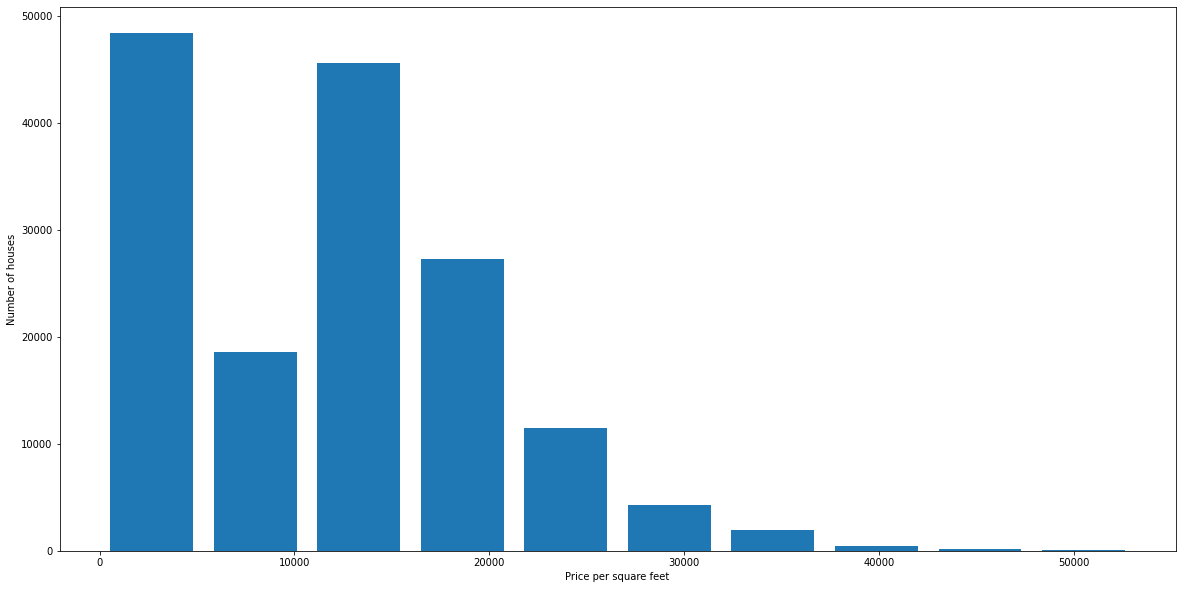

In [67]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df5['unit_rate'],rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Number of houses')

### Delete 'unit rate' column since unit rate is calculated by price and area.

In [68]:
df6 = df5.copy()
df6 = df6.drop(['unit_rate', 'floor'],axis='columns')
df6

,price,saleable_area(ft^2),district,Rental,Public Housing,unlucky_floors
0,11700000,759,Central and Western District,False,False,False
1,9780000,536,Central and Western District,False,False,True
2,11000000,697,Central and Western District,False,False,False
3,6250000,377,Central and Western District,False,False,False
4,17000000,829,Central and Western District,False,False,False
...,...,...,...,...,...,...
158083,15000,552,Yuen Long District,True,False,False
158084,12300,443,Yuen Long District,True,False,False
158085,13000,498,Yuen Long District,True,False,False
158086,13000,504,Yuen Long District,True,False,True


### Convert 'rental', 'public housing' and 'unlucky_floors' columns from boolean values to 0/1 for machine learning models

In [69]:
df7 = df6.copy()
df7['Rental'] = df7['Rental'].astype(int)
df7['Public Housing'] = df7['Public Housing'].astype(int)
df7['unlucky_floors'] = df7['unlucky_floors'].astype(int)
df7

,price,saleable_area(ft^2),district,Rental,Public Housing,unlucky_floors
0,11700000,759,Central and Western District,0,0,0
1,9780000,536,Central and Western District,0,0,1
2,11000000,697,Central and Western District,0,0,0
3,6250000,377,Central and Western District,0,0,0
4,17000000,829,Central and Western District,0,0,0
...,...,...,...,...,...,...
158083,15000,552,Yuen Long District,1,0,0
158084,12300,443,Yuen Long District,1,0,0
158085,13000,498,Yuen Long District,1,0,0
158086,13000,504,Yuen Long District,1,0,1


### Create dummies for machine learning models

In [70]:
# Transform categorical variables to dummy variables for machine learning model.

dummies_district = pd.get_dummies(df7['district'],dtype=int)
dummies_rental = pd.get_dummies(df7['Rental'],dtype=int)
dummies_public_housing = pd.get_dummies(df7['Public Housing'],dtype=int)
# dummies_district.head(3)
# dummies_rental.head(3)
# dummies_public_housing.head(3)

In [71]:
df8 = df7.copy()
df8 = pd.concat([df8, dummies_district.drop('Yuen Long District',axis='columns'), dummies_rental.drop(dummies_rental.loc[1],axis='columns'), dummies_public_housing.drop(dummies_public_housing.loc[1],axis='columns')], axis='columns')
df8.head()

,price,saleable_area(ft^2),district,Rental,Public Housing,unlucky_floors,Central and Western District,HKIsIand Eastern District,HKIsIand Southern District,Kowloon Kowloon City District,...,Kowloon Yau Tsim Mong District,Kwai Tsing District,New Territories East Long Ping Estate,New Territories East North District,New Territories East Sha Tin District,New Territories East Tai Po District,New Territories West Islands District,Tsuen Wan District,Tuen Mun District,Wan Chai District
0,11700000,759,Central and Western District,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780000,536,Central and Western District,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11000000,697,Central and Western District,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6250000,377,Central and Western District,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17000000,829,Central and Western District,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Drop District column since it has been transformed to

In [72]:
df9 = df8.copy()
df9 = df9.drop('district',axis='columns')
df9

,price,saleable_area(ft^2),Rental,Public Housing,unlucky_floors,Central and Western District,HKIsIand Eastern District,HKIsIand Southern District,Kowloon Kowloon City District,Kowloon Kwun Tong District,...,Kowloon Yau Tsim Mong District,Kwai Tsing District,New Territories East Long Ping Estate,New Territories East North District,New Territories East Sha Tin District,New Territories East Tai Po District,New Territories West Islands District,Tsuen Wan District,Tuen Mun District,Wan Chai District
0,11700000,759,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780000,536,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11000000,697,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6250000,377,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17000000,829,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158083,15000,552,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158084,12300,443,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158085,13000,498,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158086,13000,504,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Housing Price Predictions

### Create X and Y 

In [73]:
X = df9.drop('price',axis='columns')
Y = df9.price
X.head()
Y.head()

,saleable_area(ft^2),Rental,Public Housing,unlucky_floors,Central and Western District,HKIsIand Eastern District,HKIsIand Southern District,Kowloon Kowloon City District,Kowloon Kwun Tong District,Kowloon Sham Shui Po District,...,Kowloon Yau Tsim Mong District,Kwai Tsing District,New Territories East Long Ping Estate,New Territories East North District,New Territories East Sha Tin District,New Territories East Tai Po District,New Territories West Islands District,Tsuen Wan District,Tuen Mun District,Wan Chai District
0,759,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,536,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,697,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,377,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,829,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    11700000
1     9780000
2    11000000
3     6250000
4    17000000
Name: price, dtype: int64

### Compare model performance

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

c:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

,model,best_score,best_params
0,linear_regression,0.585585,{'normalize': True}
1,lasso,0.585585,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.877063,"{'criterion': 'mse', 'splitter': 'best'}"


# Prediction model

In [75]:
clf = DecisionTreeRegressor(max_depth=100)
clf = clf.fit(X,Y)

In [76]:
def predict_price(saleable_area, Rental, Public_Housing, unlucky_floors, District):
    loc_index = np.where(X.columns== District)[0][0]

    x = np.zeros(len(X.columns))
    x[0]=saleable_area
    x[1]=Rental
    x[2]=Public_Housing
    x[3]=unlucky_floors
    if loc_index >=0:
        x[loc_index] = 1

    return clf.predict([x])[0]

In [77]:
predict_price(759,1,0,0,'New Territories East Sha Tin District')
predict_price(759,0,0,0,'New Territories East Sha Tin District')
predict_price(759,1,0,0,'HKIsIand Eastern District')

c:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


34000.0

c:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


15500000.0

c:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


30500.0

In [78]:
import pickle
with open('hk_home_prices_model.pickle','wb') as f:
    pickle.dump(clf,f)

In [79]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

630